# Model Training

In [69]:
# Importing Packages

import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [27]:
# Importing the data
df = pd.read_csv('Data/stud_data.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and y

In [37]:
x = df.drop(columns=['math_score'])
y = df.math_score

x.shape, y.shape

((1000, 7), (1000,))

In [38]:
num_cols = x.select_dtypes(exclude='object').columns
cat_cols = x.select_dtypes(include='object').columns

num_cols, cat_cols

(Index(['reading_score', 'writing_score'], dtype='object'),
 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
        'test_preparation_course'],
       dtype='object'))

In [39]:
scaler = StandardScaler()
oh_enc = OneHotEncoder(drop='first')

preprocess = ColumnTransformer([
    ("One Hot Encoder", oh_enc, cat_cols),
    ("Scaling", scaler, num_cols)
])

x = preprocess.fit_transform(x)
x.shape

(1000, 14)

In [41]:
x_tr, x_tst, y_tr, y_tst = train_test_split(x, y, test_size=0.2, random_state=34)
x_tr.shape, y_tst.shape

((800, 14), (200,))

Defining a evaluate model wihch will evaluate and give scores for all the models

In [52]:
def evaluate(true, pred):
    ret = {}
    ret['MAE'] = mean_squared_error(true, pred)
    ret['MSE'] = mean_squared_error(true, pred)
    ret['RMSE'] = np.sqrt(ret['MSE']).item()
    ret['R2S'] = r2_score(true, pred)
    return ret

In [ ]:
models = {
    'Liner Regression' : LinearRegression(),
    'Lasso'            : Lasso(),
    'Ridge'            : Ridge(),
    'KNN Regressor'    : KNeighborsRegressor(),
    'Decision Tree'    : DecisionTreeRegressor(),
    'Random Forest'    : RandomForestRegressor(),
    'XG Boost'         : XGBRegressor(),
    'Ada Boost'        : AdaBoostRegressor()
}

result_list = []

for i in range(len(list(models))):
    model_name = list(models.keys())[i]
    model = list(models.values())[i]
    model.fit(x_tr, y_tr)

    # making the predections
    y_train_pred = model.predict(x_tr)
    y_test_pred = model.predict(x_tst)

    train_score = evaluate(y_tr, y_train_pred)
    train_score['Type'] = 'Training'
    train_score['Model'] = model_name
    test_score = evaluate(y_tst, y_test_pred)
    test_score['Type'] = 'Testing'
    test_score['Model'] = model_name

    print(model_name, test_score['R2S'])
    result_list.extend([train_score, test_score])


Liner Regression 0.8834745607644852
Lasso 0.8082834270012514
Ridge 0.8831479725522275
KNN Regressor 0.7899091255283397
Decision Tree 0.7343259697943243
Random Forest 0.8394384816797831
XG Boost 0.8253894448280334
Ada Boost 0.826141008506762


In [60]:
pd.DataFrame(result_list).sort_values(['Type', 'R2S'], ascending=[True, False])

,MAE,MSE,RMSE,R2S,Type,Model
1,28.832120,28.832120,5.369555,0.883475,Testing,Liner Regression
5,28.912928,28.912928,5.377074,0.883148,Testing,Ridge
11,39.728054,39.728054,6.303019,0.839438,Testing,Random Forest
15,43.018274,43.018274,6.558832,0.826141,Testing,Ada Boost
13,43.204239,43.204239,6.572993,0.825389,Testing,XG Boost
3,47.436810,47.436810,6.887439,0.808283,Testing,Lasso
7,51.983200,51.983200,7.209938,0.789909,Testing,KNN Regressor
9,65.736250,65.736250,8.107789,0.734326,Testing,Decision Tree
8,0.200625,0.200625,0.447912,0.999109,Training,Decision Tree
12,1.005593,1.005593,1.002793,0.995536,Training,XG Boost


Linear Regression model

In [66]:
model = LinearRegression(fit_intercept=True)
model.fit(x_tr, y_tr)
y_pred = model.predict(x_tst)
score = r2_score(y_tst, y_pred)*100

f"Accuracy of the model is {score : .2f}%"

'Accuracy of the model is  88.35%'

Plotting y_pred and y_test

Text(0, 0.5, 'Predicted')

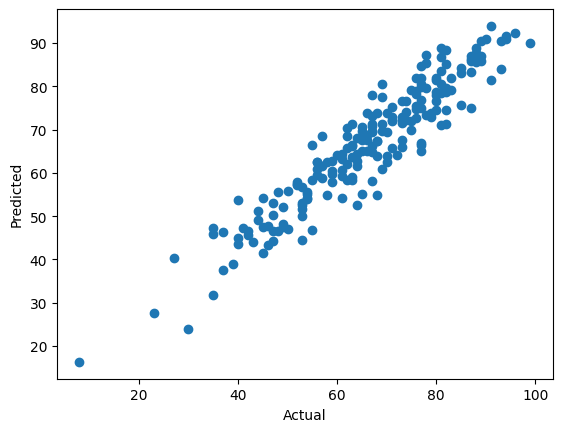

In [ ]:
plt.scatter(y_tst, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

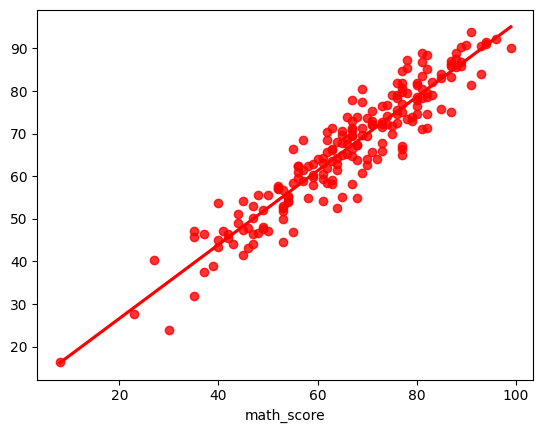

In [71]:
sns.regplot(x=y_tst,y=y_pred,ci=None,color ='red')

Difference between Actual and Predicted Values

In [74]:
pred_diff = pd.DataFrame({'Actual':y_tst, 'Pred': y_pred, 'Diff': y_tst - y_pred})
pred_diff

,Actual,Pred,Diff
430,64,64.251877,-0.251877
972,53,44.594639,8.405361
395,48,46.648693,1.351307
310,73,72.220026,0.779974
130,89,85.870989,3.129011
...,...,...,...
775,49,47.573738,1.426262
316,77,75.057214,1.942786
917,44,49.048184,-5.048184
666,63,58.238232,4.761768


In [77]:
pred_diff.min()

Actual     8.000000
Pred      16.317249
Diff     -13.630944
dtype: float64